<a href="https://colab.research.google.com/github/Sangyeonglee353/python-eda/blob/main/EDA_Slack_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json

# 폴더 경로 지정
folder_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack'
print("folder_path: " + folder_path)

# 폴더 내 모든 파일 리스트 가져오기
file_list = os.listdir(folder_path)

# print("Files in folder: ", file_list)

# # 각 파일을 순회하면서 JSON 데이터 로드
# for file_name in file_list:
#   # 파일 경로 완성
#   file_path = os.path.join(folder_path, file_name)

#   # 파일 확장자 확인(JSON 파일만 처리)
#   if file_path.endswith('.json'):
#     with open(file_path, 'r') as file:
#       data = json.load(file)
#       print("Data in", file_name, ":", data)

# folder_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack'
# channel_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack/4_행정문의방'
# file_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack/4_행정문의방/0000-00-00.json'

# 단일 파일을 순회하면서 JSON 데이터 로드
channel_path = os.path.join(folder_path, "4_행정문의방")
print("channel_path: " + channel_path)

# 폴더 내의 모든 파일을 순회
jsonDataList = []
FilenameList = []
for filename in os.listdir(channel_path):
    # 파일 확장자가 .json인 경우만 처리
    if filename.endswith('.json'):
        # 완전한 파일 경로 생성
        file_path = os.path.join(channel_path, filename)

        # 파일 열기 및 JSON 데이터 로드
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                # print(f"{filename}: {data}")
                convertFilename = filename.replace(".json", "")
                jsonData = {"date": convertFilename, "value": data}
                jsonDataList.append(jsonData)
                FilenameList.append(convertFilename)
                FilenameList.sort()
        except json.JSONDecodeError:
            print(f"Error decoding JSON from file {filename}")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")

print("총 일자: ", len(jsonDataList))
print("파일 개수: ", len(FilenameList))
print("파일 명: ", FilenameList)

print(jsonDataList[153])

folder_path: /content/drive/My Drive/data/slack/UP_AI_1기_Slack
channel_path: /content/drive/My Drive/data/slack/UP_AI_1기_Slack/4_행정문의방
총 일자:  154
파일 개수:  154
파일 명:  ['2023-10-03', '2023-10-04', '2023-10-05', '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13', '2023-10-15', '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-03', '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13', '2023-12

In [ ]:
jsonDataList[0]

{'2023-10-03': [{'subtype': 'channel_join',
   'user': 'U06061L4S64',
   'text': '<@U06061L4S64> 님이 채널에 참여함',
   'type': 'message',
   'ts': '1696343114.884549'},
  {'subtype': 'channel_join',
   'user': 'U05UYAVRTSR',
   'text': '<@U05UYAVRTSR> 님이 채널에 참여함',
   'type': 'message',
   'ts': '1696381895.015479'}]}

In [ ]:
date = '2024-05-16'
listNum = 153
print("jsonDataList_Origin: ", jsonDataList[listNum][date][0])
dataLength = len(jsonDataList[listNum][date][0])
print("dataLength: ",dataLength)

# message 1 / writer: jsonDataList[2]['2023-10-05'][0]['user_profile']['display_name']
# message 1 / content: jsonDataList[2]['2023-10-05'][0]['text']
# print("writer: " + jsonDataList[2]['2023-10-05'][0]['user_profile']['display_name'])
# print("message: " + jsonDataList[2]['2023-10-05'][0]['text'])

dailyMessageList = []
for j in range(dataLength):
  print("j: ", j)
  writer = jsonDataList[listNum][date][j]['user_profile']['display_name']
  message = jsonDataList[listNum][date][j]['text']
  client_msg_id = jsonDataList[listNum][date][j]['client_msg_id']
  jsonMessage = { 'writer' : writer, 'message' : message, 'client_msg_id' : client_msg_id }
  dailyMessageList.append(jsonMessage)

print(dailyMessageList)

jsonDataList_Origin:  {'user': 'U05VC7EEY5Q', 'type': 'message', 'ts': '1715847185.535619', 'client_msg_id': 'e53d40b6-e5df-43d1-b04d-8b2707b690bb', 'text': '<@U05UNC6FNK1> <@U05V81G5ZDY>\n대상 : 국민취업지원 서류\n필요한 기간 : 3월 23일 ~ 4월 22일\n필요 서류 : 출석부\n이메일 : <mailto:kangs7777@naver.com|kangs7777@naver.com>\n연락처 : 01053546438\n\n안녕하세요 출석부 요청드립니다. 감사합니다!', 'team': 'T05UGFFGL07', 'user_team': 'T05UGFFGL07', 'source_team': 'T05UGFFGL07', 'user_profile': {'avatar_hash': '41b3eab94662', 'image_72': 'https://avatars.slack-edge.com/2023-10-06/6000541892291_41b3eab946625ecd1c69_72.jpg', 'first_name': '강승현', 'real_name': '강승현', 'display_name': '강승현', 'team': 'T05UGFFGL07', 'name': 'kangs7777', 'is_restricted': False, 'is_ultra_restricted': False}, 'thread_ts': '1715847185.535619', 'reply_count': 2, 'reply_users_count': 2, 'latest_reply': '1716164658.348789', 'reply_users': ['U05VC7EEY5Q', 'U05UNC6FNK1'], 'replies': [{'user': 'U05VC7EEY5Q', 'ts': '1715928549.577239'}, {'user': 'U05UNC6FNK1', 'ts': '171616

IndexError: list index out of range

# 일별 메세지량 시각화

## 1. 데이터 가져오기

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Directory containing JSON files
directory = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack/4_행정문의방'

# Initialize an empty list to hold all messages
all_messages = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_messages.extend(data)  # Assuming each file contains a list of messages

print(f"Total messages loaded: {len(all_messages)}")

Total messages loaded: 1098



## 2. 결측치 데이터 확인 및 제거

### 2-1. 결측치 데이터 확인

In [ ]:
import pandas as pd

# Create a DataFrame from the messages
df = pd.DataFrame(all_messages)

# Check for missing 'ts' values
missing_ts_df = df[df['ts'].isnull()]

# Print DataFrame with missing 'ts' values
print("Messages with missing 'ts' values:")
print(missing_ts_df)

Messages with missing 'ts' values:
     subtype       user text type   ts client_msg_id team user_team  \
1080     NaN  USLACKBOT  NaN  NaN  NaN           NaN  NaN       NaN   

     source_team user_profile  ... pretty_type  editable  size  mode  \
1080         NaN          NaN  ...      Canvas      True   0.0  quip   

     is_public is_tombstoned public_url_shared date_delete  \
1080      True         False             False         0.0   

                                   url_private_download  \
1080  https://files.slack.com/files-pri/T05UGFFGL07-...   

                                                 shares  
1080  [{'team': 'T05UGFFGL07', 'channel': 'C05V0H8H3...  

[1 rows x 45 columns]


### 2-2. 결측치 데이터 제거

In [ ]:
# Filter out rows with missing 'ts'
df = df.dropna(subset=['ts'])

### 2-3. Datetime 형식 변환

In [ ]:
from datetime import datetime

# Convert timestamp to datetime and extract date
# df['date'] = df['ts'].apply(lambda x: datetime.fromtimestamp(float(x)).strftime('%Y-%m-%d'))
df['date'] = df['ts'].apply(lambda x: datetime.fromtimestamp(float(x)).strftime('%y/%m/%d'))

## 3. 일별 메시지 수치화

### 3-1. 일별 메시지 계산

In [ ]:
# Group by date and count messages
message_count = df['date'].value_counts().sort_index()

# Convert the result to a DataFrame
message_count_df = message_count.reset_index()
message_count_df.columns = ['Date', 'Message Count']

# Print the message count DataFrame
print("Message count per day:")
print(message_count_df)

Message count per day:
         Date  Message Count
0    23/10/03              1
1    23/10/04             18
2    23/10/05             26
3    23/10/06             16
4    23/10/09              3
..        ...            ...
141  24/05/14              5
142  24/05/16             10
143  24/05/17              5
144  24/05/20              1
145  24/05/23              1

[146 rows x 2 columns]


In [ ]:
import streamlit as st
import matplotlib.pyplot as plt

# Streamlit App
st.title('Slack Message Volume by Date')

# Display the data
st.write(message_count_df)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(message_count_df['Date'], message_count_df['Message Count'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per Day in Slack')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
st.pyplot(fig)

ModuleNotFoundError: No module named 'streamlit'

### 3-2. 일별 메시지_시각화 버전 1(matplot)

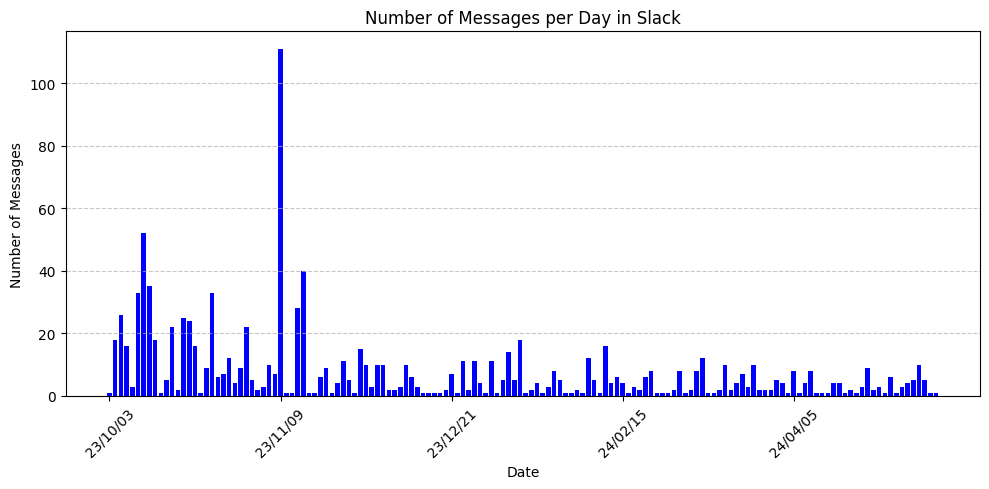

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(message_count_df['Date'], message_count_df['Message Count'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages per Day in Slack')
plt.xticks(rotation=45)
plt.tight_layout()

# Show only every n-th label
n = 30  # Change this value to show labels at different intervals
plt.gca().set_xticks(plt.gca().get_xticks()[::n])

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 3-3. 일별 메시지_시각화 버전 2(plotly)

In [ ]:
# 최초 1회 실행
!pip install plotly

In [ ]:
import plotly.express as px

# Plot the data using Plotly
fig = px.bar(message_count_df, x='Date', y='Message Count',
             labels={'Date': 'Date', 'Message Count': 'Number of Messages'},
             title='Number of Messages per Day in Slack')

# Update x-axis to show labels at specific intervals
fig.update_xaxes(
    tickmode='array',
    tickvals=message_count_df['Date'][::5],  # Show every 5th label
    ticktext=message_count_df['Date'][::5]   # Labels to show
)

# Show the plot
fig.show()

### 3-4. 최대 메시지 전달 일자 계산

## 4. 메시지 평균 응답 시간

###. [Temp] 코드

In [ ]:
# 1. 데이터 가져오기
import os
import json
import matplotlib.pyplot as plt

# Directory containing JSON files
directory = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack/4_행정문의방'

# Initialize an empty list to hold all messages
all_messages = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            all_messages.extend(data)  # Assuming each file contains a list of messages

print(f"Total messages loaded: {len(all_messages)}")

# 2. 결측치 데이터 확인 및 제거
import pandas as pd

# Create a DataFrame from the messages
df = pd.DataFrame(all_messages)

# Check for missing 'ts' values
missing_ts_df = df[df['ts'].isnull()]

# Print DataFrame with missing 'ts' values
print("Messages with missing 'ts' values:")
print(missing_ts_df)

# 결측치 데이터 제거
# Filter out rows with missing 'ts'
df = df.dropna(subset=['ts'])

# dataTime 형식 변환
from datetime import datetime

# Convert timestamp to datetime and extract date
# df['date'] = df['ts'].apply(lambda x: datetime.fromtimestamp(float(x)).strftime('%Y-%m-%d'))
df['date'] = df['ts'].apply(lambda x: datetime.fromtimestamp(float(x)).strftime('%y/%m/%d'))

Total messages loaded: 1098
Messages with missing 'ts' values:
     subtype       user text type   ts client_msg_id team user_team  \
1080     NaN  USLACKBOT  NaN  NaN  NaN           NaN  NaN       NaN   

     source_team user_profile  ... pretty_type  editable  size  mode  \
1080         NaN          NaN  ...      Canvas      True   0.0  quip   

     is_public is_tombstoned public_url_shared date_delete  \
1080      True         False             False         0.0   

                                   url_private_download  \
1080  https://files.slack.com/files-pri/T05UGFFGL07-...   

                                                 shares  
1080  [{'team': 'T05UGFFGL07', 'channel': 'C05V0H8H3...  

[1 rows x 45 columns]


### 4-1. 평균 응답 시간 계산 / Version 1: 최초 응답 > 첫 스레드

In [ ]:
# Convert timestamp fields to datetime
df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s')
df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

# Temp print
print(df[['ts', 'thread_ts']])


# Filter messages that are replies in a thread
replies_df = df.dropna(subset=['thread_ts'])

# Find the first reply in each thread
first_replies = replies_df.sort_values(by='ts').groupby('thread_ts').first().reset_index()

# Join first replies with their original messages
merged_df = pd.merge(first_replies, df, left_on='thread_ts', right_on='ts', suffixes=('_reply', '_original'))

# Calculate response time in minutes
merged_df['response_time'] = (merged_df['ts_reply'] - merged_df['ts_original']).dt.total_seconds() / 60.0  # in minutes

# Calculate average response time
# average_response_time = merged_df['response_time'].mean()

# print(f"Average response time: {average_response_time} minutes")

# Display the dataframe with response times
# print(merged_df[['thread_ts', 'response_time']])
print(merged_df[['response_time']])

TypeError: Cannot cast DatetimeArray to dtype float64

### 4-1. 평균 응답 시간 / Version 2: 두번째 응답시간 > 첫번째 댓글

In [ ]:
# Convert timestamp fields to datetime
df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s')
df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

# print temp_data
print(df[['ts', 'thread_ts']])

# Filter messages that are replies in a thread
replies_df = df.dropna(subset=['thread_ts'])

# # Find the first reply in each thread
# first_replies = replies_df.sort_values(by='ts').groupby('thread_ts').first().reset_index()

# Sort replies by thread_ts and ts to get the second reply in each thread
sorted_replies = replies_df.sort_values(by=['thread_ts', 'ts'])
second_replies = sorted_replies.groupby('thread_ts').nth(1).reset_index()

# Join first replies with their original messages
merged_df = pd.merge(second_replies, df, left_on='thread_ts', right_on='ts', suffixes=('_reply', '_original'))

# Calculate response time in minutes
merged_df['response_minute'] = (merged_df['ts_reply'] - merged_df['ts_original']).dt.total_seconds() / 60.0  # in minutes
merged_df['response_hour'] = merged_df['response_minute'] / 60.0  # in hour
merged_df['response_day'] = merged_df['response_hour'] / 24.0  # in day

# Calculate average response time
# average_response_time = merged_df['response_time'].mean()

# print(f"Average response time: {average_response_time} minutes")

# Display the dataframe with response times
# print(merged_df[['thread_ts', 'response_time']])
# print(merged_df[['response_time']])
print(merged_df[['ts_original', 'ts_reply', 'response_minute', 'response_hour', 'response_day']])

                                ts                     thread_ts
0    2023-10-03 14:25:14.884548864                           NaT
1    2023-10-04 01:11:35.015479040                           NaT
2    2023-10-04 08:12:30.698458880                           NaT
3    2023-10-04 08:15:38.334979072                           NaT
4    2023-10-04 08:19:56.751668992                           NaT
...                            ...                           ...
1093 2024-05-17 00:49:17.076199168 2024-05-17 00:49:17.076199168
1094 2024-05-17 00:50:42.580158976 2024-05-17 00:49:17.076199168
1095 2024-05-17 00:58:33.568289024 2024-05-17 00:49:17.076199168
1096 2024-05-17 01:05:57.862638848 2024-05-14 01:09:00.866458880
1097 2024-05-17 06:49:09.577239040 2024-05-16 08:13:05.535619072

[1097 rows x 2 columns]
                      ts_original                      ts_reply  \
0   2023-10-05 02:49:59.945089024 2023-10-05 02:58:14.214819072   
1   2023-10-05 02:52:19.829569024 2023-10-05 02:56:05.9316490

### 4-2. 응답 시간 시각화

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(merged_df['thread_ts'], merged_df['response_time'], marker='o', linestyle='-', label='Response Time')

plt.xlabel('Thread Timestamp')
plt.ylabel('Response Time (minutes)')
plt.title('First Response Time per Thread')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'thread_ts'

<Figure size 1400x700 with 0 Axes>

### 4-3. 평균 응답 마무리(처리) 시간 계산

In [ ]:
# Convert timestamp fields to datetime
df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s')
df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

# Filter messages that are replies in a thread
replies_df = df.dropna(subset=['thread_ts'])

# Find the last reply in each thread
first_replies = replies_df.sort_values(by='ts').groupby('thread_ts').last().reset_index()

# Join first replies with their original messages
merged_df = pd.merge(first_replies, df, left_on='thread_ts', right_on='ts', suffixes=('_reply', '_original'))

# Calculate response time in minutes
merged_df['response_time'] = (merged_df['ts_reply'] - merged_df['ts_original']).dt.total_seconds() / 60.0  # in minutes

# Calculate average response time
# average_response_time = merged_df['response_time'].mean()

# print(f"Average response time: {average_response_time} minutes")

# Display the dataframe with response times
# print(merged_df[['thread_ts', 'response_time']])
print(merged_df[['response_time']])

     response_time
0       340.226530
1         4.664612
2         6.244903
3       130.099836
4       154.672942
..             ...
226    2585.344280
227      66.963086
228    5291.213553
229       7.175236
230       9.274868

[231 rows x 1 columns]


# 5. 행정 문의방_CS 데이터 추출

In [ ]:
import os
import json
import pandas as pd
from datetime import datetime

# 폴더 경로 지정
folder_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack'
channel_path = os.path.join(folder_path, "4_행정문의방")

# 폴더 내의 모든 파일을 순회
jsonDataList = []
FilenameList = []
for filename in os.listdir(channel_path):
    # 파일 확장자가 .json인 경우만 처리
    if filename.endswith('.json'):
        # 완전한 파일 경로 생성
        file_path = os.path.join(channel_path, filename)

        # 파일 열기 및 JSON 데이터 로드
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                convertFilename = filename.replace(".json", "")
                jsonData = {"date": convertFilename, "value": data}
                jsonDataList.append(jsonData)
                FilenameList.append(convertFilename)
                FilenameList.sort()
        except json.JSONDecodeError:
            print(f"Error decoding JSON from file {filename}")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")

# 데이터를 저장할 리스트 초기화
result_data = []

# JSON 데이터를 순회하며 스레드와 댓글을 추출
for item in jsonDataList:
    date = item['date']
    messages = item['value']

    # 메시지를 DataFrame으로 변환
    df = pd.DataFrame(messages)

    # 'ts' 열이 없는 경우 기본 값을 추가
    if 'ts' not in df.columns:
        df['ts'] = None

    # 'thread_ts' 열이 없는 경우 기본 값을 추가
    if 'thread_ts' not in df.columns:
        df['thread_ts'] = None

    # 'text' 열이 없는 경우 기본 값을 추가
    if 'text' not in df.columns:
        df['text'] = None

    # 타임스탬프 필드를 datetime 형식으로 변환
    df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s', errors='coerce')
    df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

    # 데이터프레임 구조 확인
    # print(f"DataFrame structure for date {date}:")
    # print(df.head())

    # 원본 스레드 메시지를 필터링
    # original_threads = df[df['thread_ts'].isnull()]
    original_threads = df[df['thread_ts'].notnull()]

    # 필터링된 스레드 확인
    # print(f"Original threads for date {date}:")
    # print(original_threads[['ts', 'text']].head())

    # 각 원본 스레드를 순회하며 댓글을 추출
    for _, thread in original_threads.iterrows():
        thread_ts = thread['ts']
        thread_text = thread['text']

        # 스레드에 속한 모든 댓글을 필터링
        # print("df['thread_ts]: ", df['thread_ts'])
        # print("thread_ts: ", thread_ts)
        # print(df['thread_ts'] == thread_ts)
        comments = df[df['thread_ts'] == thread_ts]

        # 필터링된 댓글 확인
        # print(f"Comments for thread {thread_ts} on date {date}:")
        # print(comments[['ts', 'text']].head())

        # 각 댓글을 순회하며 결과 데이터에 추가
        for _, comment in comments.iterrows():
            # print(f"Adding comment from thread {thread_ts} on date {date}: {comment['text']}")
            result_data.append({
                'Date': date,
                'Thread Message': thread_text,
                'Comment': comment['text'],
                'Comment Author': comment['user'] if 'user' in comment else 'Unknown',
                'Thread Timestamp': thread_ts  # thread_ts를 추가
            })

# result_data 리스트 출력
print(f"Result data collected: {len(result_data)} items")

# 결과 데이터를 DataFrame으로 변환 및 정렬
result_df = pd.DataFrame(result_data, columns=['Date', 'Thread Message', 'Comment', 'Comment Author', 'Thread Timestamp'])

# thread_ts 기준으로 정렬
result_df_sorted = result_df.sort_values(by='Thread Timestamp')

# DataFrame 출력
print(result_df_sorted)

# CSV 파일로 저장
csv_file_path = '/content/drive/My Drive/data/result/slack/UP_AI기_thread_comments.csv'
result_df_sorted.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


Result data collected: 770 items
           Date                                     Thread Message  \
0    2023-10-04  제가 국민취업지원제도를 통해서 훈련을 신청해서 훈련탐색표가 필요합니다. 혹시 직업훈...   
1    2023-10-04  제가 국민취업지원제도를 통해서 훈련을 신청해서 훈련탐색표가 필요합니다. 혹시 직업훈...   
2    2023-10-04               저도 훈련탐색표가 필요하다고 하는데 탐색표를 받을 수. 있을까요?   
3    2023-10-04               저도 훈련탐색표가 필요하다고 하는데 탐색표를 받을 수. 있을까요?   
4    2023-10-04               저도 훈련탐색표가 필요하다고 하는데 탐색표를 받을 수. 있을까요?   
..          ...                                                ...   
764  2024-05-16  <@U05UNC6FNK1> <@U05V81G5ZDY> \n최종 만족도 조사가 계속 ...   
766  2024-05-16  <@U05UNC6FNK1> <@U05V81G5ZDY> \n최종 만족도 조사가 계속 ...   
768  2024-05-16   <@U05UNC6FNK1> 저도 만족도 조사가 뜨지 않아서요.. 부탁 좀 드리겠습니다.   
767  2024-05-16   <@U05UNC6FNK1> 저도 만족도 조사가 뜨지 않아서요.. 부탁 좀 드리겠습니다.   
769  2024-05-16   <@U05UNC6FNK1> 저도 만족도 조사가 뜨지 않아서요.. 부탁 좀 드리겠습니다.   

                                               Comment Comment Author  \
0    제가 국민취업지원제도를 통해서 훈련을 신청해서 훈련탐색표가 필요합니다. 혹시 직업훈..

## 5-1. 정상 출력 코드 버전 1
- [ date | thread_message | comment | comment_author | comment_ts ]
- 유형: 한 열에 모두 출력

In [ ]:
import os
import json
import pandas as pd
from datetime import datetime

# 폴더 경로 지정
folder_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack'
channel_path = os.path.join(folder_path, "1_운영질문방")

# 폴더 내의 모든 파일을 순회
jsonDataList = []
FilenameList = []
for filename in os.listdir(channel_path):
    # 파일 확장자가 .json인 경우만 처리
    if filename.endswith('.json'):
        # 완전한 파일 경로 생성
        file_path = os.path.join(channel_path, filename)

        # 파일 열기 및 JSON 데이터 로드
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                convertFilename = filename.replace(".json", "")
                jsonData = {"date": convertFilename, "value": data}
                jsonDataList.append(jsonData)
                FilenameList.append(convertFilename)
                FilenameList.sort()
        except json.JSONDecodeError:
            print(f"Error decoding JSON from file {filename}")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")

# 데이터를 저장할 리스트 초기화
result_data = []

# JSON 데이터를 순회하며 스레드와 댓글을 추출
for item in jsonDataList:
    date = item['date']
    messages = item['value']

    # 메시지를 DataFrame으로 변환
    df = pd.DataFrame(messages)

    # 'ts' 열이 없는 경우 기본 값을 추가
    if 'ts' not in df.columns:
        df['ts'] = None

    # 'thread_ts' 열이 없는 경우 기본 값을 추가
    if 'thread_ts' not in df.columns:
        df['thread_ts'] = None

    # 'text' 열이 없는 경우 기본 값을 추가
    if 'text' not in df.columns:
        df['text'] = None

    # 타임스탬프 필드를 datetime 형식으로 변환
    df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s', errors='coerce')
    df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

    # 데이터프레임 구조 확인
    print(f"DataFrame structure for date {date}:")
    print(df.head())

    # thread_ts 값이 null이 아닌 행을 필터링 (원본 스레드 메시지들)
    threads = df[df['thread_ts'].notnull()]

    # 필터링된 스레드 확인
    print(f"Threads for date {date}:")
    print(threads[['ts', 'text']].head())

    # 각 원본 스레드를 순회하며 댓글을 추출
    for _, thread in threads.iterrows():
        thread_ts = thread['ts']
        thread_text = thread['text']

        # 스레드에 속한 모든 댓글을 필터링
        comments = df[df['thread_ts'] == thread_ts]

        # 필터링된 댓글 확인
        print(f"Comments for thread {thread_ts} on date {date}:")
        print(comments[['ts', 'text']].head())

        # 각 댓글을 순회하며 결과 데이터에 추가
        for _, comment in comments.iterrows():
            # 스레드의 원본 메시지는 추가하지 않음
            if comment['ts'] != thread_ts:
                print(f"Adding comment from thread {thread_ts} on date {date}: {comment['text']}")
                result_data.append({
                    'Date': date,
                    'Thread Message': thread_text,
                    'Comment': comment['text'],
                    'Comment Author': comment['user'] if 'user' in comment else 'Unknown',
                    'Thread Timestamp': thread_ts  # thread_ts를 추가
                })

# result_data 리스트 출력
print(f"Result data collected: {len(result_data)} items")

# 결과 데이터를 DataFrame으로 변환 및 정렬
result_df = pd.DataFrame(result_data, columns=['Date', 'Thread Message', 'Comment', 'Comment Author', 'Thread Timestamp'])

# thread_ts 기준으로 정렬
result_df_sorted = result_df.sort_values(by='Thread Timestamp')

# DataFrame 출력
print(result_df_sorted)

# CSV 파일로 저장
# AD: 행정문의, CS: 운영질문
csv_file_path = '/content/drive/My Drive/data/result/slack/UP_AI_1기_CS_thread_comments.csv'
result_df_sorted.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


DataFrame structure for date 2024-01-14:
          user     type                            ts  \
0  U05V9N22ZUK  message 2024-01-15 06:58:14.916619008   
1  U05VADPQPCL  message 2024-01-15 07:02:08.705818880   
2  U05V9N22ZUK  message 2024-01-15 07:02:58.128279040   
3  U05VADPQPCL  message 2024-01-15 07:03:49.886228992   
4  U05V9N22ZUK  message 2024-01-15 07:04:06.163558912   

                          client_msg_id  \
0  8cf480a7-9ee1-43e8-82a9-3a59f1f803a9   
1  e966ee07-e0f4-4e30-b72b-7231c792ad91   
2  f60d8f2a-f91c-4d4e-8a50-a240cd392a23   
3  f849482d-dc96-402a-8039-9949d12fd38e   
4  605406ff-67a8-4795-af82-cc7f444ee68b   

                                                text         team  \
0   각 그룹별 Fork가 현재 불가능하게 설정되어 있는데 혹시 이거 풀어주실 예정이신가요?  T05UGFFGL07   
1  안녕하세요 태한님!\n경진 대회 이후 모든 조의 Repo가 Public으로 전환되며...  T05UGFFGL07   
2             <@U05VADPQPCL> 경진대회가 끝난 이후라고 이해하면 될까요?  T05UGFFGL07   
3                         네 맞습니다 26일 19시 이후부터 가능합니다.  T05UGFFGL07   
4           

## 5-2. 정상 코드 버전 2
- [ date | Thread_message | comment 1 | comment author 1.... ]
- 유형: 열을 늘리는 형태

In [ ]:
import os
import json
import pandas as pd
from datetime import datetime

# 폴더 경로 지정
folder_path = '/content/drive/My Drive/data/slack/UP_AI_1기_Slack'
channel_path = os.path.join(folder_path, "4_행정문의방")

# 폴더 내의 모든 파일을 순회
jsonDataList = []
FilenameList = []
for filename in os.listdir(channel_path):
    # 파일 확장자가 .json인 경우만 처리
    if filename.endswith('.json'):
        # 완전한 파일 경로 생성
        file_path = os.path.join(channel_path, filename)

        # 파일 열기 및 JSON 데이터 로드
        try:
            with open(file_path, 'r') as file:
                data = json.load(file)
                convertFilename = filename.replace(".json", "")
                jsonData = {"date": convertFilename, "value": data}
                jsonDataList.append(jsonData)
                FilenameList.append(convertFilename)
                FilenameList.sort()
        except json.JSONDecodeError:
            print(f"Error decoding JSON from file {filename}")
        except Exception as e:
            print(f"An error occurred while reading {filename}: {e}")

# 데이터를 저장할 리스트 초기화
result_data = []

# JSON 데이터를 순회하며 스레드와 댓글을 추출
for item in jsonDataList:
    date = item['date']
    messages = item['value']

    # 메시지를 DataFrame으로 변환
    df = pd.DataFrame(messages)

    # 'ts' 열이 없는 경우 기본 값을 추가
    if 'ts' not in df.columns:
        df['ts'] = None

    # 'thread_ts' 열이 없는 경우 기본 값을 추가
    if 'thread_ts' not in df.columns:
        df['thread_ts'] = None

    # 'text' 열이 없는 경우 기본 값을 추가
    if 'text' not in df.columns:
        df['text'] = None

    # 타임스탬프 필드를 datetime 형식으로 변환
    df['ts'] = pd.to_datetime(df['ts'].astype(float), unit='s', errors='coerce')
    df['thread_ts'] = pd.to_datetime(df['thread_ts'].astype(float), unit='s', errors='coerce')

    # 데이터프레임 구조 확인
    print(f"DataFrame structure for date {date}:")
    print(df.head())

    # 원본 스레드 메시지를 필터링
    threads = df[df['thread_ts'].notnull()]

    # 필터링된 스레드 확인
    print(f"Threads for date {date}:")
    print(threads[['ts', 'text']].head())

    # 각 원본 스레드를 순회하며 댓글을 추출
    for _, thread in threads.iterrows():
        thread_ts = thread['ts']
        thread_text = thread['text']

        # 스레드에 속한 모든 댓글을 필터링
        comments = df[df['thread_ts'] == thread_ts]

        # 필터링된 댓글 확인
        print(f"Comments for thread {thread_ts} on date {date}:")
        print(comments[['ts', 'text']].head())

        # 댓글을 열로 추가
        row = {
            'Date': date,
            'Thread Message': thread_text,
            'Thread Timestamp': thread_ts
        }


        for i, (_, comment) in enumerate(comments.iterrows(), start=1):
            row[f'Comment {i}'] = comment['text']
            row[f'Comment Author {i}'] = comment['user'] if 'user' in comment else 'Unknown'

        result_data.append(row)

# result_data 리스트 출력
print(f"Result data collected: {len(result_data)} items")

# 결과 데이터를 DataFrame으로 변환
result_df = pd.DataFrame(result_data)

# DataFrame 출력
print(result_df)

# CSV 파일로 저장
csv_file_path = '/content/drive/My Drive/data/result/slack/UP_AI기_thread_comments_columns.csv'
result_df.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
                                               files upload display_as_bot  \
0                                                NaN    NaN            NaN   
1  [{'id': 'F06RE4PFKC5', 'created': 1711501951, ...  False          False   

  parent_user_id  
0            NaN  
1    U05V2GDNNLT  

[2 rows x 23 columns]
Threads for date 2024-03-26:
                             ts  \
0 2024-03-27 00:57:41.577598976   
1 2024-03-27 01:12:36.826419200   

                                                text  
0  <@U05UNC6FNK1> <@U05V81G5ZDY>\n대상 : 국민취업지원 서류\...  
1                                       출석부 전달 드립니다!  
Comments for thread 2024-03-27 00:57:41.577598976 on date 2024-03-26:
                             ts  \
0 2024-03-27 00:57:41.577598976   
1 2024-03-27 01:12:36.826419200   

                                                text  
0  <@U05UNC6FNK1> <@U05V81G5ZDY>\n대상 : 국민취업지원 서류\...  
1                                       출석부 전달 드립니다!  
Comments